# CHECK & STATIC DATA

In [1]:
import pandas as pd
sequences = pd.read_csv('src/data/csv/dishes.csv').combined_info.values

In [2]:
import pandas as pd
import re
from collections import Counter
from underthesea import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

d:\graph_rag\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


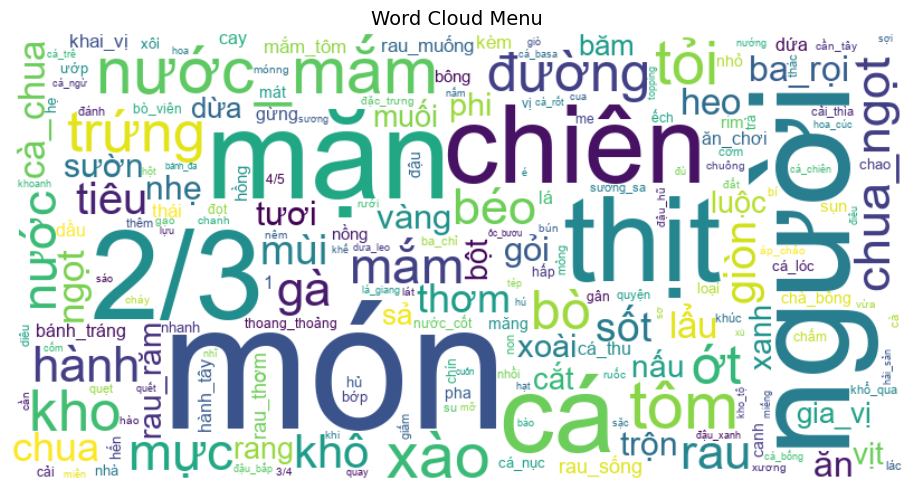

In [3]:
from src.utils.helpers import helpers
from pyvi import ViTokenizer

df = pd.read_csv("./src/data/csv/dishes.csv")

sequences = df.combined_info.values
normalized = helpers.normalize_vnese(' '.join(sequences))
normalized = helpers.clean_vietnamese_text(normalized)
normalized = ' '.join(word_tokenize(normalized))
normalized = ViTokenizer.tokenize(normalized)
sequences = [str(helpers.normalize_record(text=seq)).lower() for seq in normalized.split(" , ")]
sequences = [helpers.remove_stopwords_and_not_vi(text=seq, path_documents_vi='./src/data/stopwords-vietnamese.txt') for seq in sequences]
sequences = [seq.replace(" - ", "/") for seq in sequences if seq]

tokens = ' '.join(sequences).split()
freq = Counter(tokens)

font_path = r"C:\Windows\Fonts\arial.ttf"   # chứa tiếng Việt ổn
wc = WordCloud(width=800, height=400,
               background_color="white",
               font_path=font_path,
               collocations=False).generate_from_frequencies(freq)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud Menu", fontsize=14)
plt.tight_layout()
plt.show()

In [4]:
print("Word total", freq.total())
print(freq.most_common(freq.total()))

Word total 3360
[('món', 221), ('người', 123), ('mặn', 99), ('2/3', 98), ('thịt', 87), ('chiên', 74), ('cá', 74), ('nước_mắm', 60), ('tôm', 59), ('xào', 55), ('tỏi', 50), ('trứng', 46), ('kho', 44), ('đường', 40), ('ớt', 39), ('bò', 39), ('mực', 38), ('mắm', 37), ('béo', 35), ('nước', 35), ('chua_ngọt', 35), ('hành', 34), ('gà', 34), ('rau', 34), ('khô', 31), ('giòn', 28), ('tiêu', 28), ('mùi', 24), ('sốt', 24), ('thơm', 23), ('chua', 23), ('ngọt', 22), ('heo', 20), ('cà_chua', 20), ('lẩu', 20), ('ăn', 19), ('ba_rọi', 19), ('vàng', 18), ('gỏi', 18), ('nhẹ', 17), ('tươi', 17), ('trộn', 17), ('sườn', 17), ('phi', 16), ('xoài', 16), ('rau_răm', 15), ('nấu', 15), ('vịt', 15), ('bột', 14), ('rang', 14), ('muối', 14), ('xanh', 14), ('cắt', 14), ('luộc', 14), ('dừa', 13), ('gia_vị', 13), ('băm', 13), ('sả', 13), ('rau_sống', 13), ('rau_thơm', 13), ('khai_vị', 12), ('kèm', 12), ('thái', 12), ('mắm_tôm', 12), ('rau_muống', 12), ('cay', 11), ('lá', 11), ('bánh_tráng', 11), ('ăn_chơi', 11), ('dầu

| Ký hiệu | Tên gốc       | Ý nghĩa tiếng Việt    | Ví dụ                    |
| ------- | ------------- | --------------------- | ------------------------ |
| **N**   | Noun          | danh từ               | thịt, cá, bánh, nước mắm |
| **V**   | Verb          | động từ               | chiên, kho, xào, nướng   |
| **A**   | Adjective     | tính từ               | béo, cay, giòn, ngọt     |
| **P**   | Preposition   | giới từ               | trong, với, ra, vào      |
| **CH**  | Punctuation   | dấu câu               | , . ; ! ?                |
| **M**   | Numeral       | số / số lượng         | 1, 2, 145000, ba, năm    |
| **Nb**  | Number        | số đếm / lượng từ     | hai, ba, mười            |
| **Ny**  | Pronoun       | đại từ nhân xưng      | tôi, mình, ta, họ        |
| **R**   | Adverb        | phó từ                | rất, khá, cũng, đã       |
| **L**   | Determiner    | hạn định từ           | này, kia, đó, ấy         |
| **I**   | Interjection  | thán từ               | à, nhé, ạ, ôi            |
| **E**   | Exclamation   | cảm thán              | chao, trời, ha           |
| **C**   | Conjunction   | liên từ               | và, hay, nhưng, vì       |
| **T**   | Time          | thời gian từ          | hôm, nay, mai, sáng      |
| **D**   | Demonstrative | chỉ thị từ            | đây, đấy, kia            |
| **Nc**  | Classifier    | danh từ phụ (loại từ) | con, cái, chiếc, lát     |


In [5]:
from underthesea import pos_tag
from collections import Counter
import pandas as pd

sequences = df.combined_info.values
normalized = helpers.normalize_vnese(' '.join(sequences))
normalized = helpers.clean_vietnamese_text(normalized)
normalized = ' '.join(word_tokenize(normalized))
normalized = ViTokenizer.tokenize(normalized)
sequences = [str(helpers.normalize_record(text=seq)).lower() for seq in normalized.split(" , ")]
sequences = [helpers.remove_stopwords_and_not_vi(text=seq, path_documents_vi='./src/data/stopwords-vietnamese.txt') for seq in sequences]
sequences = [seq.replace(" - ", "/") for seq in sequences if seq]

tokens = ' '.join(sequences).split()

tokens_pos = pos_tag(' '.join(tokens).lower())        # list[(từ, loại_từ), ...]
pos_counts = Counter(pos for _, pos in tokens_pos)
summary = (pd.Series(pos_counts)
             .rename_axis('POS')
             .reset_index(name='token_count')
             .sort_values('token_count', ascending=False))
pos_meaning = {
    'N':'danh từ', 'V':'động từ', 'A':'tính từ', 'P':'giới từ',
    'CH':'dấu câu', 'M':'số', 'Nb':'số đếm', 'Ny':'đại từ',
    'R':'phó từ', 'L':'hạn định từ', 'I':'thán từ', 'E':'cảm thán',
    'C':'liên từ', 'T':'thời gian từ', 'D':'chỉ thị từ', 'Nc':'loại từ'
}
summary['meaning'] = summary['POS'].map(pos_meaning)
summary = summary[['POS', 'meaning', 'token_count']].sort_values('token_count', ascending=False)
print(summary.to_string(index=False))

POS  meaning  token_count
  N  danh từ         1716
  V  động từ          957
  A  tính từ          295
 Nc  loại từ           28
  M       số           16
  R   phó từ            8
  Z      NaN            6
 CH  dấu câu            2
 FW      NaN            2
  E cảm thán            1


# CHECK TOOLS MCP

In [14]:
from langchain_mcp_adapters.client import MultiServerMCPClient
from langchain_mcp_adapters.tools import load_mcp_tools
import time

client = MultiServerMCPClient({
    "restaurant": {
        "url": "http://localhost:8000/mcp", 
        "transport": "streamable_http"
    }
})

async def call_tool(name, args=None):
    start = time.time()
    async with client.session("restaurant") as session:
        result = await session.call_tool(name, args or {})
        print(f"\n=== {name} ===")
        for content in result.content:
            print(content.text)
    end = time.time()
    print(f"[Thời gian thực thi]: {end - start:.4f} giây")
    return result

# 1. list tools
async with client.session("restaurant") as session:
    tools = await load_mcp_tools(session)
    print("=== Danh sách tools ===\n")
    len_tools = len(tools)
    print(f"Tổng số lượng tools: {len_tools}")
    for t in tools:
        print()
        print(f'[Tool] {t.name}: """ {t.description} """')

=== Danh sách tools ===

Tổng số lượng tools: 5

[Tool] init_database: """ ... """

[Tool] hybrid_search: """ Retrieve restaurant and dish info from the knowledge base.
Supports:
- Restaurant details: name, location, cuisine, opening hours
- Dish details: name, ingredients, dietary info, cooking style
Increasing 'k' allows fetching more candidate results for better coverage. """

[Tool] search_database: """ Tìm món ăn theo tên, tag hoặc ingredient """

[Tool] xem_schema: """ Xem schema graph hiện tại """

[Tool] tim_theo_gia: """ Tìm món ≤ giá tối đã """


In [15]:
await call_tool("init_database")


=== init_database ===
✅ Đã khởi tạo dữ liệu mẫu vào Neo4j
[Thời gian thực thi]: 0.8002 giây


CallToolResult(meta=None, content=[TextContent(type='text', text='✅ Đã khởi tạo dữ liệu mẫu vào Neo4j', annotations=None, meta=None)], structuredContent=None, isError=False)

In [16]:
await call_tool(
    "search_database", 
    {
        "req": {
            "query": "ếch hay cua đồng xào nấu với lá giang", "k": 10 # yêu cầu: id 109
            }
    }
)


=== search_database ===
[{"id":"109","name_food":"Lẩu ếch lá giang","type_food":"LẨU","score":43.515140533447266},{"id":"108","name_food":"Lẩu cua mónng","type_food":"LẨU","score":18.214509963989258},{"id":"22","name_food":"Ếch chiên nước mắm","type_food":"MÓN ĂN CHƠI","score":12.456134796142578},{"id":"82","name_food":"Trứng chiên hành","type_food":"MÓN GÀ, VỊT & TRỨNG","score":7.481426239013672},{"id":"74","name_food":"Gà tre hấp mắm nhĩ","type_food":"MÓN GÀ, VỊT & TRỨNG","score":7.304370880126953},{"id":"102","name_food":"Canh diêu hồng nấu ngót","type_food":"MÓN CANH","score":7.145471572875977},{"id":"81","name_food":"Trứng chiên cà chua","type_food":"MÓN GÀ, VỊT & TRỨNG","score":6.758678436279297},{"id":"83","name_food":"Bò xào rau muống","type_food":"MÓN XÀO","score":6.72578239440918},{"id":"87","name_food":"Bò xào cải ngồng","type_food":"MÓN XÀO","score":6.405834197998047},{"id":"86","name_food":"Đọt su xào bò","type_food":"MÓN XÀO","score":6.405834197998047}]
[Thời gian thực t

CallToolResult(meta=None, content=[TextContent(type='text', text='[{"id":"109","name_food":"Lẩu ếch lá giang","type_food":"LẨU","score":43.515140533447266},{"id":"108","name_food":"Lẩu cua mónng","type_food":"LẨU","score":18.214509963989258},{"id":"22","name_food":"Ếch chiên nước mắm","type_food":"MÓN ĂN CHƠI","score":12.456134796142578},{"id":"82","name_food":"Trứng chiên hành","type_food":"MÓN GÀ, VỊT & TRỨNG","score":7.481426239013672},{"id":"74","name_food":"Gà tre hấp mắm nhĩ","type_food":"MÓN GÀ, VỊT & TRỨNG","score":7.304370880126953},{"id":"102","name_food":"Canh diêu hồng nấu ngót","type_food":"MÓN CANH","score":7.145471572875977},{"id":"81","name_food":"Trứng chiên cà chua","type_food":"MÓN GÀ, VỊT & TRỨNG","score":6.758678436279297},{"id":"83","name_food":"Bò xào rau muống","type_food":"MÓN XÀO","score":6.72578239440918},{"id":"87","name_food":"Bò xào cải ngồng","type_food":"MÓN XÀO","score":6.405834197998047},{"id":"86","name_food":"Đọt su xào bò","type_food":"MÓN XÀO","sco

In [17]:
await call_tool(
    "hybrid_search", {
    "query": "bún chả",
    "k": 30
})


=== hybrid_search ===
[{"id":null,"metadata":{"current_price":"155,000","outstanding_fragrance":"Kho quẹt, mỡ hành","_name":"Cơm cháy chảo kho quẹt","taste":"món mặn","row":11,"id":"13274491c74b71d1e0642dec6b8b90ef","source":"src/data/csv/dishes.csv","type_of_food":"MÓN KHAI VỊ","_id":"12","main_ingredients":"Cơm, Cơm trắng, tôm khô, thịt ba chỉ, chà bông","how_to_prepare":"Cơm chiên phồng, Cơm trắng chiên phồng, ăn kèm kho quẹt tôm khô","number_of_people_eating":"2-3 người"},"page_content":"\ntext: MÓN KHAI VỊ, Cơm cháy chảo kho quẹt, Cơm chiên phồng, Cơm trắng chiên phồng, ăn kèm kho quẹt tôm khô, Cơm, Cơm trắng, tôm khô, thịt ba chỉ, chà bông, món mặn, Kho quẹt, mỡ hành, 2-3 người","type":"Document"},{"id":null,"metadata":{"current_price":"150,000","outstanding_fragrance":"Thịt bò viên chiên","_name":"Bò viên gân chiên","taste":"món mặn, béo nhẹ","row":19,"id":"642d56fc47a6bacce9bfff6776877012","source":"src/data/csv/dishes.csv","type_of_food":"MÓN ĂN CHƠI","_id":"20","main_ingredi

CallToolResult(meta=None, content=[TextContent(type='text', text='[{"id":null,"metadata":{"current_price":"155,000","outstanding_fragrance":"Kho quẹt, mỡ hành","_name":"Cơm cháy chảo kho quẹt","taste":"món mặn","row":11,"id":"13274491c74b71d1e0642dec6b8b90ef","source":"src/data/csv/dishes.csv","type_of_food":"MÓN KHAI VỊ","_id":"12","main_ingredients":"Cơm, Cơm trắng, tôm khô, thịt ba chỉ, chà bông","how_to_prepare":"Cơm chiên phồng, Cơm trắng chiên phồng, ăn kèm kho quẹt tôm khô","number_of_people_eating":"2-3 người"},"page_content":"\\ntext: MÓN KHAI VỊ, Cơm cháy chảo kho quẹt, Cơm chiên phồng, Cơm trắng chiên phồng, ăn kèm kho quẹt tôm khô, Cơm, Cơm trắng, tôm khô, thịt ba chỉ, chà bông, món mặn, Kho quẹt, mỡ hành, 2-3 người","type":"Document"},{"id":null,"metadata":{"current_price":"150,000","outstanding_fragrance":"Thịt bò viên chiên","_name":"Bò viên gân chiên","taste":"món mặn, béo nhẹ","row":19,"id":"642d56fc47a6bacce9bfff6776877012","source":"src/data/csv/dishes.csv","type_of_

In [18]:
await call_tool(
    "hybrid_search", {
    "query": "dượng bầu",
    "k": 30
})


=== hybrid_search ===
[{"id":null,"metadata":{"current_price":"490,000","outstanding_fragrance":"Rau mónng, mắm ruốc nhẹ","_name":"Lẩu Dượng Bầu","taste":"món mặn","row":111,"id":"d39ccc4266d836cf6ae1c3695bed3940","source":"src/data/csv/dishes.csv","type_of_food":"LẨU","_id":"112","main_ingredients":"Cá mónng, rau bông mùa nước nổi","how_to_prepare":"Lẩu cá linh, cá lóc… với bông điên điển, rau mónng","number_of_people_eating":"4-5 người"},"page_content":"\ntext: LẨU, Lẩu Dượng Bầu, Lẩu cá linh, cá lóc… với bông điên điển, rau mónng, Cá mónng, rau bông mùa nước nổi, món mặn, Rau mónng, mắm ruốc nhẹ, 4-5 người","type":"Document"},{"id":null,"metadata":{"current_price":"115,000","outstanding_fragrance":"Khổ qua, trứng béo","_name":"Nụ bí xào tỏi","taste":"món mặn","row":94,"id":"bf99a9e146d0411b3abdc2a8f1126c71","source":"src/data/csv/dishes.csv","type_of_food":"MÓN RAU","_id":"95","main_ingredients":"Nụ bí, tỏi","how_to_prepare":"Khổ qua, trứng gà","number_of_people_eating":"2-3 người"

CallToolResult(meta=None, content=[TextContent(type='text', text='[{"id":null,"metadata":{"current_price":"490,000","outstanding_fragrance":"Rau mónng, mắm ruốc nhẹ","_name":"Lẩu Dượng Bầu","taste":"món mặn","row":111,"id":"d39ccc4266d836cf6ae1c3695bed3940","source":"src/data/csv/dishes.csv","type_of_food":"LẨU","_id":"112","main_ingredients":"Cá mónng, rau bông mùa nước nổi","how_to_prepare":"Lẩu cá linh, cá lóc… với bông điên điển, rau mónng","number_of_people_eating":"4-5 người"},"page_content":"\\ntext: LẨU, Lẩu Dượng Bầu, Lẩu cá linh, cá lóc… với bông điên điển, rau mónng, Cá mónng, rau bông mùa nước nổi, món mặn, Rau mónng, mắm ruốc nhẹ, 4-5 người","type":"Document"},{"id":null,"metadata":{"current_price":"115,000","outstanding_fragrance":"Khổ qua, trứng béo","_name":"Nụ bí xào tỏi","taste":"món mặn","row":94,"id":"bf99a9e146d0411b3abdc2a8f1126c71","source":"src/data/csv/dishes.csv","type_of_food":"MÓN RAU","_id":"95","main_ingredients":"Nụ bí, tỏi","how_to_prepare":"Khổ qua, trứ

In [19]:
await call_tool(
    "search_database", 
    {
        "req": {
            "query": "dượng bầu", "k": 10
            }
    }
)


=== search_database ===
[{"id":"112","name_food":"Lẩu Dượng Bầu","type_food":"LẨU","score":15.498052597045898},{"id":"92","name_food":"Rau luộc thập cẩm kho quẹt","type_food":"MÓN RAU","score":6.620233535766602}]
[Thời gian thực thi]: 0.2143 giây


CallToolResult(meta=None, content=[TextContent(type='text', text='[{"id":"112","name_food":"Lẩu Dượng Bầu","type_food":"LẨU","score":15.498052597045898},{"id":"92","name_food":"Rau luộc thập cẩm kho quẹt","type_food":"MÓN RAU","score":6.620233535766602}]', annotations=None, meta=None)], structuredContent=None, isError=False)

In [20]:
await call_tool(
    "search_database", 
    {
        "req": {
            "query": "rau và cay", "k": 10
            }
    }
)


=== search_database ===
[{"id":"26","name_food":"Gỏi mực chua cay","type_food":"MÓN GỎI","score":12.21330451965332},{"id":"3","name_food":"Hến xúc bánh đa","type_food":"MÓN KHAI VỊ","score":12.178555488586426},{"id":"29","name_food":"Gỏi tôm sốt thái","type_food":"MÓN GỎI","score":10.106949806213379},{"id":"68","name_food":"Tôm rang muối cay","type_food":"MÓN TÔM & MỰC","score":7.444516181945801},{"id":"15","name_food":"Bắp giò heo rút xương lên mẹt","type_food":"MÓN ĂN CHƠI","score":6.868581771850586},{"id":"51","name_food":"Cá thu chiên mắm xoài","type_food":"MÓN CÁ","score":6.578128814697266},{"id":"27","name_food":"Gỏi cuốn tôm thịt","type_food":"MÓN GỎI","score":6.417447090148926},{"id":"13","name_food":"Bánh hỏi heo quay","type_food":"MÓN ĂN CHƠI","score":6.27520751953125},{"id":"71","name_food":"Sườn cọng chiên muối ớt","type_food":"MÓN SƯỜN & ĐẬU HŨ","score":5.497570991516113},{"id":"30","name_food":"Gỏi gà bắp chuối","type_food":"MÓN GỎI","score":5.420327186584473}]
[Thời gia

CallToolResult(meta=None, content=[TextContent(type='text', text='[{"id":"26","name_food":"Gỏi mực chua cay","type_food":"MÓN GỎI","score":12.21330451965332},{"id":"3","name_food":"Hến xúc bánh đa","type_food":"MÓN KHAI VỊ","score":12.178555488586426},{"id":"29","name_food":"Gỏi tôm sốt thái","type_food":"MÓN GỎI","score":10.106949806213379},{"id":"68","name_food":"Tôm rang muối cay","type_food":"MÓN TÔM & MỰC","score":7.444516181945801},{"id":"15","name_food":"Bắp giò heo rút xương lên mẹt","type_food":"MÓN ĂN CHƠI","score":6.868581771850586},{"id":"51","name_food":"Cá thu chiên mắm xoài","type_food":"MÓN CÁ","score":6.578128814697266},{"id":"27","name_food":"Gỏi cuốn tôm thịt","type_food":"MÓN GỎI","score":6.417447090148926},{"id":"13","name_food":"Bánh hỏi heo quay","type_food":"MÓN ĂN CHƠI","score":6.27520751953125},{"id":"71","name_food":"Sườn cọng chiên muối ớt","type_food":"MÓN SƯỜN & ĐẬU HŨ","score":5.497570991516113},{"id":"30","name_food":"Gỏi gà bắp chuối","type_food":"MÓN G

In [21]:
# 3. tim_theo_gia
await call_tool(
    "tim_theo_gia",
    {
        "req": {
            "max_price": 150000
            }
    }
)


=== tim_theo_gia ===
[{"id":"5","ten":"Cơm cháy mỡ hành chà bông","current_price":"150,000"},{"id":"14","ten":"Xôi chiên chà bông","current_price":"150,000"},{"id":"19","ten":"Bò viên nước lèo","current_price":"150,000"},{"id":"20","ten":"Bò viên gân chiên","current_price":"150,000"},{"id":"21","ten":"Chả giò tôm đất","current_price":"150,000"},{"id":"27","ten":"Gỏi cuốn tôm thịt","current_price":"150,000"},{"id":"28","ten":"Gỏi dưa leo tôm khô","current_price":"150,000"},{"id":"34","ten":"Thịt kho tiêu","current_price":"150,000"},{"id":"36","ten":"Ba rọi cháy cạnh","current_price":"150,000"},{"id":"37","ten":"Thịt luộc cà pháo mắm tôm","current_price":"150,000"},{"id":"39","ten":"Ba rọi mắm ruốc","current_price":"150,000"},{"id":"40","ten":"Ba rọi rim dừa","current_price":"150,000"},{"id":"47","ten":"Cá trê chiên mắm xoài","current_price":"150,000"},{"id":"49","ten":"Cá sặc trộn xoài","current_price":"150,000"},{"id":"50","ten":"Mắm kho miền Tây","current_price":"150,000"},{"id":"52"

CallToolResult(meta=None, content=[TextContent(type='text', text='[{"id":"5","ten":"Cơm cháy mỡ hành chà bông","current_price":"150,000"},{"id":"14","ten":"Xôi chiên chà bông","current_price":"150,000"},{"id":"19","ten":"Bò viên nước lèo","current_price":"150,000"},{"id":"20","ten":"Bò viên gân chiên","current_price":"150,000"},{"id":"21","ten":"Chả giò tôm đất","current_price":"150,000"},{"id":"27","ten":"Gỏi cuốn tôm thịt","current_price":"150,000"},{"id":"28","ten":"Gỏi dưa leo tôm khô","current_price":"150,000"},{"id":"34","ten":"Thịt kho tiêu","current_price":"150,000"},{"id":"36","ten":"Ba rọi cháy cạnh","current_price":"150,000"},{"id":"37","ten":"Thịt luộc cà pháo mắm tôm","current_price":"150,000"},{"id":"39","ten":"Ba rọi mắm ruốc","current_price":"150,000"},{"id":"40","ten":"Ba rọi rim dừa","current_price":"150,000"},{"id":"47","ten":"Cá trê chiên mắm xoài","current_price":"150,000"},{"id":"49","ten":"Cá sặc trộn xoài","current_price":"150,000"},{"id":"50","ten":"Mắm kho miề

In [22]:
await call_tool(
    "search_database", 
    {
        "req": {
            "query": "2-3 người", "k": 10
            }
    }
)

await call_tool(
    "search_database", 
    {
        "req": {
            "query": "huhu haha hihi cứt", "k": 10
            }
    }
)

await call_tool(
    "search_database", 
    {
        "req": {
            "query": "1 người", "k": 10
            }
    }
)


=== search_database ===
[{"id":"7","name_food":"Chả mực Hạ Long","type_food":"MÓN KHAI VỊ","score":0.8391076326370239},{"id":"57","name_food":"Khô cá đù","type_food":"CÁC LOẠI KHÔ","score":0.8391076326370239},{"id":"58","name_food":"Khô cá dứa","type_food":"CÁC LOẠI KHÔ","score":0.8391076326370239},{"id":"66","name_food":"Tôm rim","type_food":"MÓN TÔM & MỰC","score":0.8391076326370239},{"id":"59","name_food":"Khô cá lóc","type_food":"CÁC LOẠI KHÔ","score":0.8391076326370239},{"id":"95","name_food":"Nụ bí xào tỏi","type_food":"MÓN RAU","score":0.8391076326370239},{"id":"65","name_food":"Tôm rim mặn","type_food":"MÓN TÔM & MỰC","score":0.8161534070968628},{"id":"60","name_food":"Mực chiên giòn","type_food":"MÓN TÔM & MỰC","score":0.8161534070968628},{"id":"97","name_food":"Đọt su xào tỏi","type_food":"MÓN RAU","score":0.8161534070968628},{"id":"96","name_food":"Rau muống xào tỏi","type_food":"MÓN RAU","score":0.8051407933235168}]
[Thời gian thực thi]: 0.1803 giây

=== search_database ==

CallToolResult(meta=None, content=[TextContent(type='text', text='[{"id":"120","name_food":"Trà đá","type_food":"NƯỚC MÁT NHÀ LÀM","score":5.405044078826904},{"id":"122","name_food":"Nước suối","type_food":"NƯỚC MÁT NHÀ LÀM","score":5.156006336212158},{"id":"121","name_food":"Coca / 7 UP","type_food":"NƯỚC MÁT NHÀ LÀM","score":5.002350330352783},{"id":"123","name_food":"Bia các loại (Tiger, Heineken, Saigon)","type_food":"NƯỚC MÁT NHÀ LÀM","score":4.857587814331055},{"id":"119","name_food":"Trà tắc","type_food":"NƯỚC MÁT NHÀ LÀM","score":4.655500411987305},{"id":"117","name_food":"Trà hoa cúc mật ong","type_food":"NƯỚC MÁT NHÀ LÀM","score":4.29789400100708},{"id":"116","name_food":"Củ sen","type_food":"NƯỚC MÁT NHÀ LÀM","score":4.190595626831055},{"id":"6","name_food":"Sụn gà rang muối","type_food":"MÓN KHAI VỊ","score":4.1389312744140625},{"id":"118","name_food":"Nước sâm","type_food":"NƯỚC MÁT NHÀ LÀM","score":4.088525295257568},{"id":"113","name_food":"Chè đậu xanh đánh","type_food"

In [23]:
# 4. xem_schema
tools = await call_tool("xem_schema")


=== xem_schema ===
{"nodes":[{"id":-102,"labels":["Order"],"name":"Order","indexes":["customer_id","dish_id"],"constraints":["Constraint( id=21, name='order_unique_id', type='UNIQUENESS', schema=(:Order {order_id}), ownedIndex=9 )"]},{"id":-101,"labels":["Customer"],"name":"Customer","indexes":["phone","email"],"constraints":["Constraint( id=22, name='customer_unique_id', type='UNIQUENESS', schema=(:Customer {customer_id}), ownedIndex=8 )"]},{"id":-103,"labels":["Bill"],"name":"Bill","indexes":[],"constraints":["Constraint( id=19, name='bill_unique_id', type='UNIQUENESS', schema=(:Bill {bill_id}), ownedIndex=10 )"]},{"id":-104,"labels":["Question"],"name":"Question","indexes":["intent_name","customer_id"],"constraints":["Constraint( id=20, name='question_unique_id', type='UNIQUENESS', schema=(:Question {question_id}), ownedIndex=11 )"]},{"id":-100,"labels":["Chunk"],"name":"Chunk","indexes":["embedding","text","combine_info"],"constraints":["Constraint( id=18, name='chunk_unique_id', 

In [24]:
await call_tool(
    "tim_theo_gia",
    {
        "req": {
            "max_price": 1000000
            }
    }
)


=== tim_theo_gia ===
[{"id":"108","ten":"Lẩu cua mónng","current_price":"490,000"},{"id":"110","ten":"Lẩu cá bớp","current_price":"490,000"},{"id":"111","ten":"Lẩu mắm","current_price":"490,000"},{"id":"112","ten":"Lẩu Dượng Bầu","current_price":"490,000"},{"id":"106","ten":"Lẩu cá thì là","current_price":"480,000"},{"id":"107","ten":"Lẩu cá thác lác","current_price":"480,000"},{"id":"109","ten":"Lẩu ếch lá giang","current_price":"480,000"},{"id":"74","ten":"Gà tre hấp mắm nhĩ","current_price":"375,000"},{"id":"48","ten":"Cá diêu hồng chiên xù cuốn bánh tráng","current_price":"220,000"},{"id":"62","ten":"Mực ống nhồi thịt","current_price":"220,000"},{"id":"64","ten":"Mực trứng hấp gừng","current_price":"210,000"},{"id":"71","ten":"Sườn cọng chiên muối ớt","current_price":"205,000"},{"id":"103","ten":"Canh cá bóp măng chua","current_price":"195,000"},{"id":"60","ten":"Mực chiên giòn","current_price":"190,000"},{"id":"68","ten":"Tôm rang muối cay","current_price":"190,000"},{"id":"13","

CallToolResult(meta=None, content=[TextContent(type='text', text='[{"id":"108","ten":"Lẩu cua mónng","current_price":"490,000"},{"id":"110","ten":"Lẩu cá bớp","current_price":"490,000"},{"id":"111","ten":"Lẩu mắm","current_price":"490,000"},{"id":"112","ten":"Lẩu Dượng Bầu","current_price":"490,000"},{"id":"106","ten":"Lẩu cá thì là","current_price":"480,000"},{"id":"107","ten":"Lẩu cá thác lác","current_price":"480,000"},{"id":"109","ten":"Lẩu ếch lá giang","current_price":"480,000"},{"id":"74","ten":"Gà tre hấp mắm nhĩ","current_price":"375,000"},{"id":"48","ten":"Cá diêu hồng chiên xù cuốn bánh tráng","current_price":"220,000"},{"id":"62","ten":"Mực ống nhồi thịt","current_price":"220,000"},{"id":"64","ten":"Mực trứng hấp gừng","current_price":"210,000"},{"id":"71","ten":"Sườn cọng chiên muối ớt","current_price":"205,000"},{"id":"103","ten":"Canh cá bóp măng chua","current_price":"195,000"},{"id":"60","ten":"Mực chiên giòn","current_price":"190,000"},{"id":"68","ten":"Tôm rang muối 

In [25]:
async def test_list_tools():
    async with client.session("restaurant") as session:
        tools = await load_mcp_tools(session)
        print("=== Danh sách tools ===")
        for t in tools:
            print(f"- {t.name}: {t.description}")

await test_list_tools()

await call_tool("hybrid_search", {
    "query": "bún chả",
    "k": 30
})

await call_tool(
    "tim_theo_gia", 
    {
        "req": {
            "max_price": 50000
        }
    }
)

await call_tool("xem_schema")

await call_tool("goi_y_mua_kem", {
    "dish_id": "D001"
})


=== Danh sách tools ===
- init_database: ...
- hybrid_search: Retrieve restaurant and dish info from the knowledge base.
Supports:
- Restaurant details: name, location, cuisine, opening hours
- Dish details: name, ingredients, dietary info, cooking style
Increasing 'k' allows fetching more candidate results for better coverage.
- search_database: Tìm món ăn theo tên, tag hoặc ingredient
- xem_schema: Xem schema graph hiện tại
- tim_theo_gia: Tìm món ≤ giá tối đã

=== hybrid_search ===
[{"id":null,"metadata":{"current_price":"155,000","outstanding_fragrance":"Kho quẹt, mỡ hành","_name":"Cơm cháy chảo kho quẹt","taste":"món mặn","row":11,"id":"13274491c74b71d1e0642dec6b8b90ef","source":"src/data/csv/dishes.csv","type_of_food":"MÓN KHAI VỊ","_id":"12","main_ingredients":"Cơm, Cơm trắng, tôm khô, thịt ba chỉ, chà bông","how_to_prepare":"Cơm chiên phồng, Cơm trắng chiên phồng, ăn kèm kho quẹt tôm khô","number_of_people_eating":"2-3 người"},"page_content":"\ntext: MÓN KHAI VỊ, Cơm cháy chảo 

CallToolResult(meta=None, content=[TextContent(type='text', text='Unknown tool: goi_y_mua_kem', annotations=None, meta=None)], structuredContent=None, isError=True)

In [26]:
async with client.session("restaurant") as session:
    results = await session.call_tool("hybrid_search", {
        "query": "món bún chả",
        "k": 30
    })
    print(results)


meta=None content=[TextContent(type='text', text='[{"id":null,"metadata":{"current_price":"189,000","outstanding_fragrance":"Cá chiên, thì là","_name":"Chả cá lên mẹt","taste":"món mặn","row":15,"id":"f4d964fbb30d70f729fe115ee5116fd1","source":"src/data/csv/dishes.csv","type_of_food":"MÓN ĂN CHƠI","_id":"16","main_ingredients":"Cá, thì là, gia vị","how_to_prepare":"Cá quết nhuyễn, chiên vàng","number_of_people_eating":"2-3 người"},"page_content":"\\ntext: MÓN ĂN CHƠI, Chả cá lên mẹt, Cá quết nhuyễn, chiên vàng, Cá, thì là, gia vị, món mặn, Cá chiên, thì là, 2-3 người","type":"Document"},{"id":null,"metadata":{"current_price":"150,000","outstanding_fragrance":"Thịt bò viên chiên","_name":"Bò viên gân chiên","taste":"món mặn, béo nhẹ","row":19,"id":"642d56fc47a6bacce9bfff6776877012","source":"src/data/csv/dishes.csv","type_of_food":"MÓN ĂN CHƠI","_id":"20","main_ingredients":"Bò viên gân","how_to_prepare":"Bò viên gân chiên giòn","number_of_people_eating":"2-3 người"},"page_content":"\\n

In [27]:
async with client.session("restaurant") as session:
    schema = await session.call_tool("xem_schema", {})
    print(schema)

meta=None content=[TextContent(type='text', text='{"nodes":[{"id":-112,"labels":["Order"],"name":"Order","indexes":["customer_id","dish_id"],"constraints":["Constraint( id=21, name=\'order_unique_id\', type=\'UNIQUENESS\', schema=(:Order {order_id}), ownedIndex=9 )"]},{"id":-111,"labels":["Customer"],"name":"Customer","indexes":["phone","email"],"constraints":["Constraint( id=22, name=\'customer_unique_id\', type=\'UNIQUENESS\', schema=(:Customer {customer_id}), ownedIndex=8 )"]},{"id":-113,"labels":["Bill"],"name":"Bill","indexes":[],"constraints":["Constraint( id=19, name=\'bill_unique_id\', type=\'UNIQUENESS\', schema=(:Bill {bill_id}), ownedIndex=10 )"]},{"id":-114,"labels":["Question"],"name":"Question","indexes":["intent_name","customer_id"],"constraints":["Constraint( id=20, name=\'question_unique_id\', type=\'UNIQUENESS\', schema=(:Question {question_id}), ownedIndex=11 )"]},{"id":-110,"labels":["Chunk"],"name":"Chunk","indexes":["embedding","text","combine_info"],"constraints"

In [28]:
import pandas as pd
file_path="src\data\hoanghamobile_with_summary.csv"
df = pd.read_csv(file_path, nrows=1, encoding="utf-8")
all_columns = df.columns.tolist()
# Define which column will be the content
content_column = "combined_info"
# All other columns go into metadata (exclude content_column)
metadata_columns = [col for col in all_columns if col != content_column]

from langchain_community.document_loaders import CSVLoader
loader = CSVLoader(file_path,
    csv_args={
        'delimiter': ',',
        'quotechar': '"'
    },
    content_columns=content_column,
    metadata_columns=metadata_columns,
    encoding='utf-8'
)
documents = loader.load()